In [11]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima  
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("online_retail.csv", )
df['sales'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
day_sales = df['sales'].resample('D').sum() 
result = adfuller(day_sales)   
print('ADF Statistic: %f' % result[0])  
print('p-value: %f' % result[1])

ADF Statistic: -1.940809
p-value: 0.313113


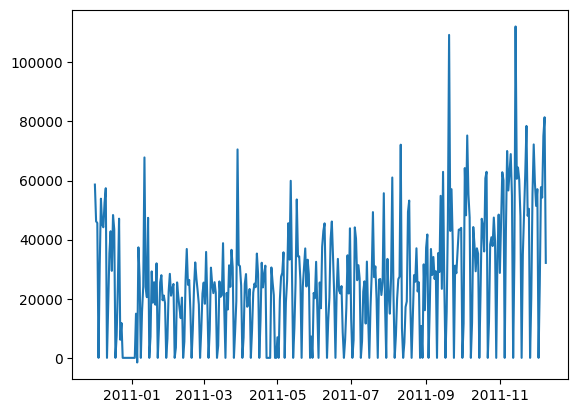

In [9]:
plt.plot(day_sales.index, day_sales.values)

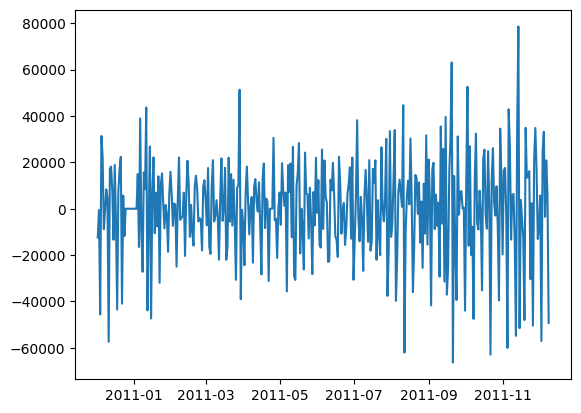

In [10]:
day_diff_sales = day_sales.diff().dropna()
plt.plot(day_diff_sales.index, day_diff_sales.values)

In [ ]:
model = auto_arima(day_diff_sales, seasonal=True, m=30, trace=True, 
                   error_action='ignore', suppress_warnings=True, stepwise=True)  
model_fit = model.fit(day_diff_sales)  
forecast = model_fit.predict(n_periods=90) 
forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=8340.578, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=8502.697, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=8462.366, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=8370.668, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=8500.701, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[30] intercept   : AIC=8340.142, Time=1.38 sec
 ARIMA(2,0,2)(0,0,0)[30] intercept   : AIC=8364.750, Time=0.14 sec
 ARIMA(2,0,2)(0,0,2)[30] intercept   : AIC=8336.256, Time=7.57 sec
 ARIMA(2,0,2)(1,0,2)[30] intercept   : AIC=inf, Time=18.38 sec
 ARIMA(1,0,2)(0,0,2)[30] intercept   : AIC=8330.230, Time=5.56 sec
 ARIMA(1,0,2)(0,0,1)[30] intercept   : AIC=8333.690, Time=1.52 sec
 ARIMA(1,0,2)(1,0,2)[30] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(1,0,2)(1,0,1)[30] intercept   : AIC=8334.603, Time=1.55 sec
 ARIMA(0,0,2)(0,0,2)[30] intercept   : AIC=8329.990, Time=2.92 sec
 ARIMA(0,0,2)(0,0,1)[30] in

2011-12-10   -13480.383188
2011-12-11    17732.196469
2011-12-12    17730.338573
2011-12-13    11328.923834
2011-12-14    11062.045575
                  ...     
2012-03-04     3500.540274
2012-03-05    16577.657779
2012-03-06    17144.455282
2012-03-07     4832.673372
2012-03-08   -11052.074469
Freq: D, Length: 90, dtype: float64

In [12]:
model = auto_arima(day_diff_sales, seasonal=True, m=7, trace=True, 
                   error_action='ignore', suppress_warnings=True, stepwise=True)  
model_fit = model.fit(day_diff_sales)  
forecast = model_fit.predict(n_periods=90) 
forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=8502.697, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=8333.181, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=8274.761, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=8500.701, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=8393.162, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=8182.891, Time=0.36 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=8269.870, Time=0.29 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=8241.748, Time=0.60 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=8242.456, Time=0.80 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=8295.219, Time=0.50 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=8266.140, Time=0.08 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=8339.135, Time=0.07 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=8

2011-12-10   -24572.506204
2011-12-11    25658.791661
2011-12-12    25407.138738
2011-12-13    -1433.850183
2011-12-14     5524.031247
                  ...     
2012-03-04    19990.524430
2012-03-05    21601.973234
2012-03-06     -571.285672
2012-03-07     1936.284587
2012-03-08     2587.901240
Freq: D, Length: 90, dtype: float64

In [44]:
df1 = pd.read_csv("online_retail.csv", )
df1['sales'] = df1['Quantity'] * df1['UnitPrice']
df_ts = df1[['InvoiceDate', 'sales']]
df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate']) 
df_ts.set_index('InvoiceDate', inplace=True)
day_sales = df_ts['sales'].resample('D').sum()
day_diff_sales = day_sales.diff().dropna()

model = SARIMAX(day_diff_sales, order=(0,0,2), seasonal_order=(1,0,2,7)) 
model_fit = model.fit(disp=False)  
forecast = model_fit.forecast(steps=82)
forecast_df = pd.DataFrame(forecast)
forecast_df.rename(columns={'predicted_mean': 'sales'}, inplace=True)
df_ts = df_ts.combine_first(forecast_df)


/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_71507/3094625132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate'])
/Users/zeni/opt/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [47]:
df_ts

,sales
2010-12-01 08:26:00,15.300000
2010-12-01 08:26:00,20.340000
2010-12-01 08:26:00,22.000000
2010-12-01 08:26:00,20.340000
2010-12-01 08:26:00,20.340000
...,...
2012-02-25 00:00:00,-34150.844139
2012-02-26 00:00:00,20193.895928
2012-02-27 00:00:00,21821.738638
2012-02-28 00:00:00,-577.097587


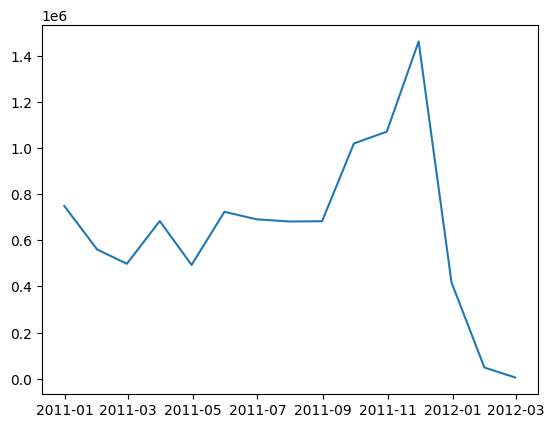

In [48]:
monthly_sales = df_ts['sales'].resample('M').sum()
plt.plot(monthly_sales.index, monthly_sales.values)

/var/folders/j6/02mk1mdd2_537vnvkvxzxld80000gn/T/ipykernel_71507/3908488073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate'])
/Users/zeni/opt/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/zeni/opt/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/zeni/opt/anaconda3/envs/py311/

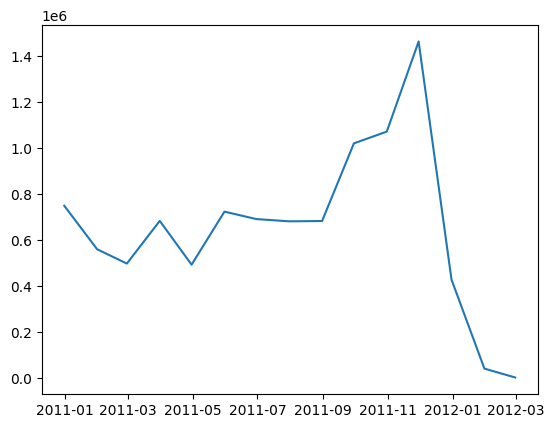

In [49]:
df1 = pd.read_csv("online_retail.csv", )
df1['sales'] = df1['Quantity'] * df1['UnitPrice']
df_ts = df1[['InvoiceDate', 'sales']]
df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate']) 
df_ts.set_index('InvoiceDate', inplace=True)
day_sales = df_ts['sales'].resample('D').sum()
day_diff_sales = day_sales.diff().dropna()

model = SARIMAX(day_diff_sales, order=(5,0,2), seasonal_order=(0,0,0,30)) 
model_fit = model.fit(disp=False)  
forecast = model_fit.forecast(steps=82)
forecast_df = pd.DataFrame(forecast)
forecast_df.rename(columns={'predicted_mean': 'sales'}, inplace=True)
df_ts = df_ts.combine_first(forecast_df)

monthly_sales = df_ts['sales'].resample('M').sum() 
plt.plot(monthly_sales.index, monthly_sales.values)